### Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transaction s. We have to build a classification model to predict whether a transaction is fraudulent or not.

# Load Data and Read Data 

In [1]:
import pandas as pd 

df = pd.read_csv('creditcard.csv')

In [2]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Exploratory Data Analysis (EDA) & Data cleaning

In [3]:
df.head()   #to check some initial records of dataset . By default head() is showing 5 records

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.shape)  # To check the dimensions of dataset 
print("So total {} rows and {} columns.".format(df.shape[0],df.shape[1]))

(284807, 31)
So total 284807 rows and 31 columns.


In [5]:
# Data Quality Check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(df.isnull().sum()) # check missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no null values in the given dataset. So, no need to work on null values in dataset.

In [7]:
df.duplicated().sum()

1081

In [8]:
# drop duplicates
df = df.drop_duplicates()

In [9]:
df.shape   # This is new datashape

(283726, 31)

# Preprocessing and Feature Engineering

In [23]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

##### 0 --> Normal Transactions
##### 1 --> Fraudulent Transactions
##### This dataset is highly Unbalanced as it contains more than 99% of normal transactions and less than 1% fraudulent transactions and on training this dataset will result in giving only normal transaction as every transaction.

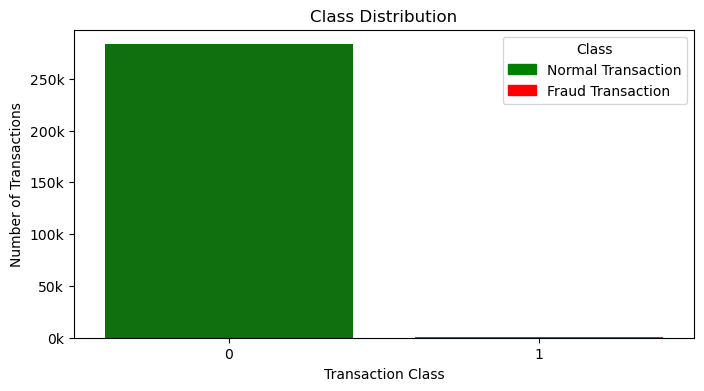

In [27]:
# Visualization of fraud vs non-fraud transactions
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format y-axis numbers as 'k' for thousands
def thousands_formatter(X, pos):
    return f'{int(X/1000)}k'

# Set custom colors: green for non-fraud (0) and red for fraud (1)
colors = {0: 'green', 1: 'red'}

plt.figure(figsize=(8, 4))
sns_plot = sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distribution')

# Add labels for the x-axis and y-axis
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')

# Format the y-axis ticks to show 'k' for thousands
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Add a custom legend to indicate the colors
handles = [plt.Rectangle((0,0),1,1, color='green', label='Normal Transaction'),
           plt.Rectangle((0,0),1,1, color='red', label='Fraud Transaction')]
plt.legend(handles=handles, title='Class', loc='upper right')

plt.show()

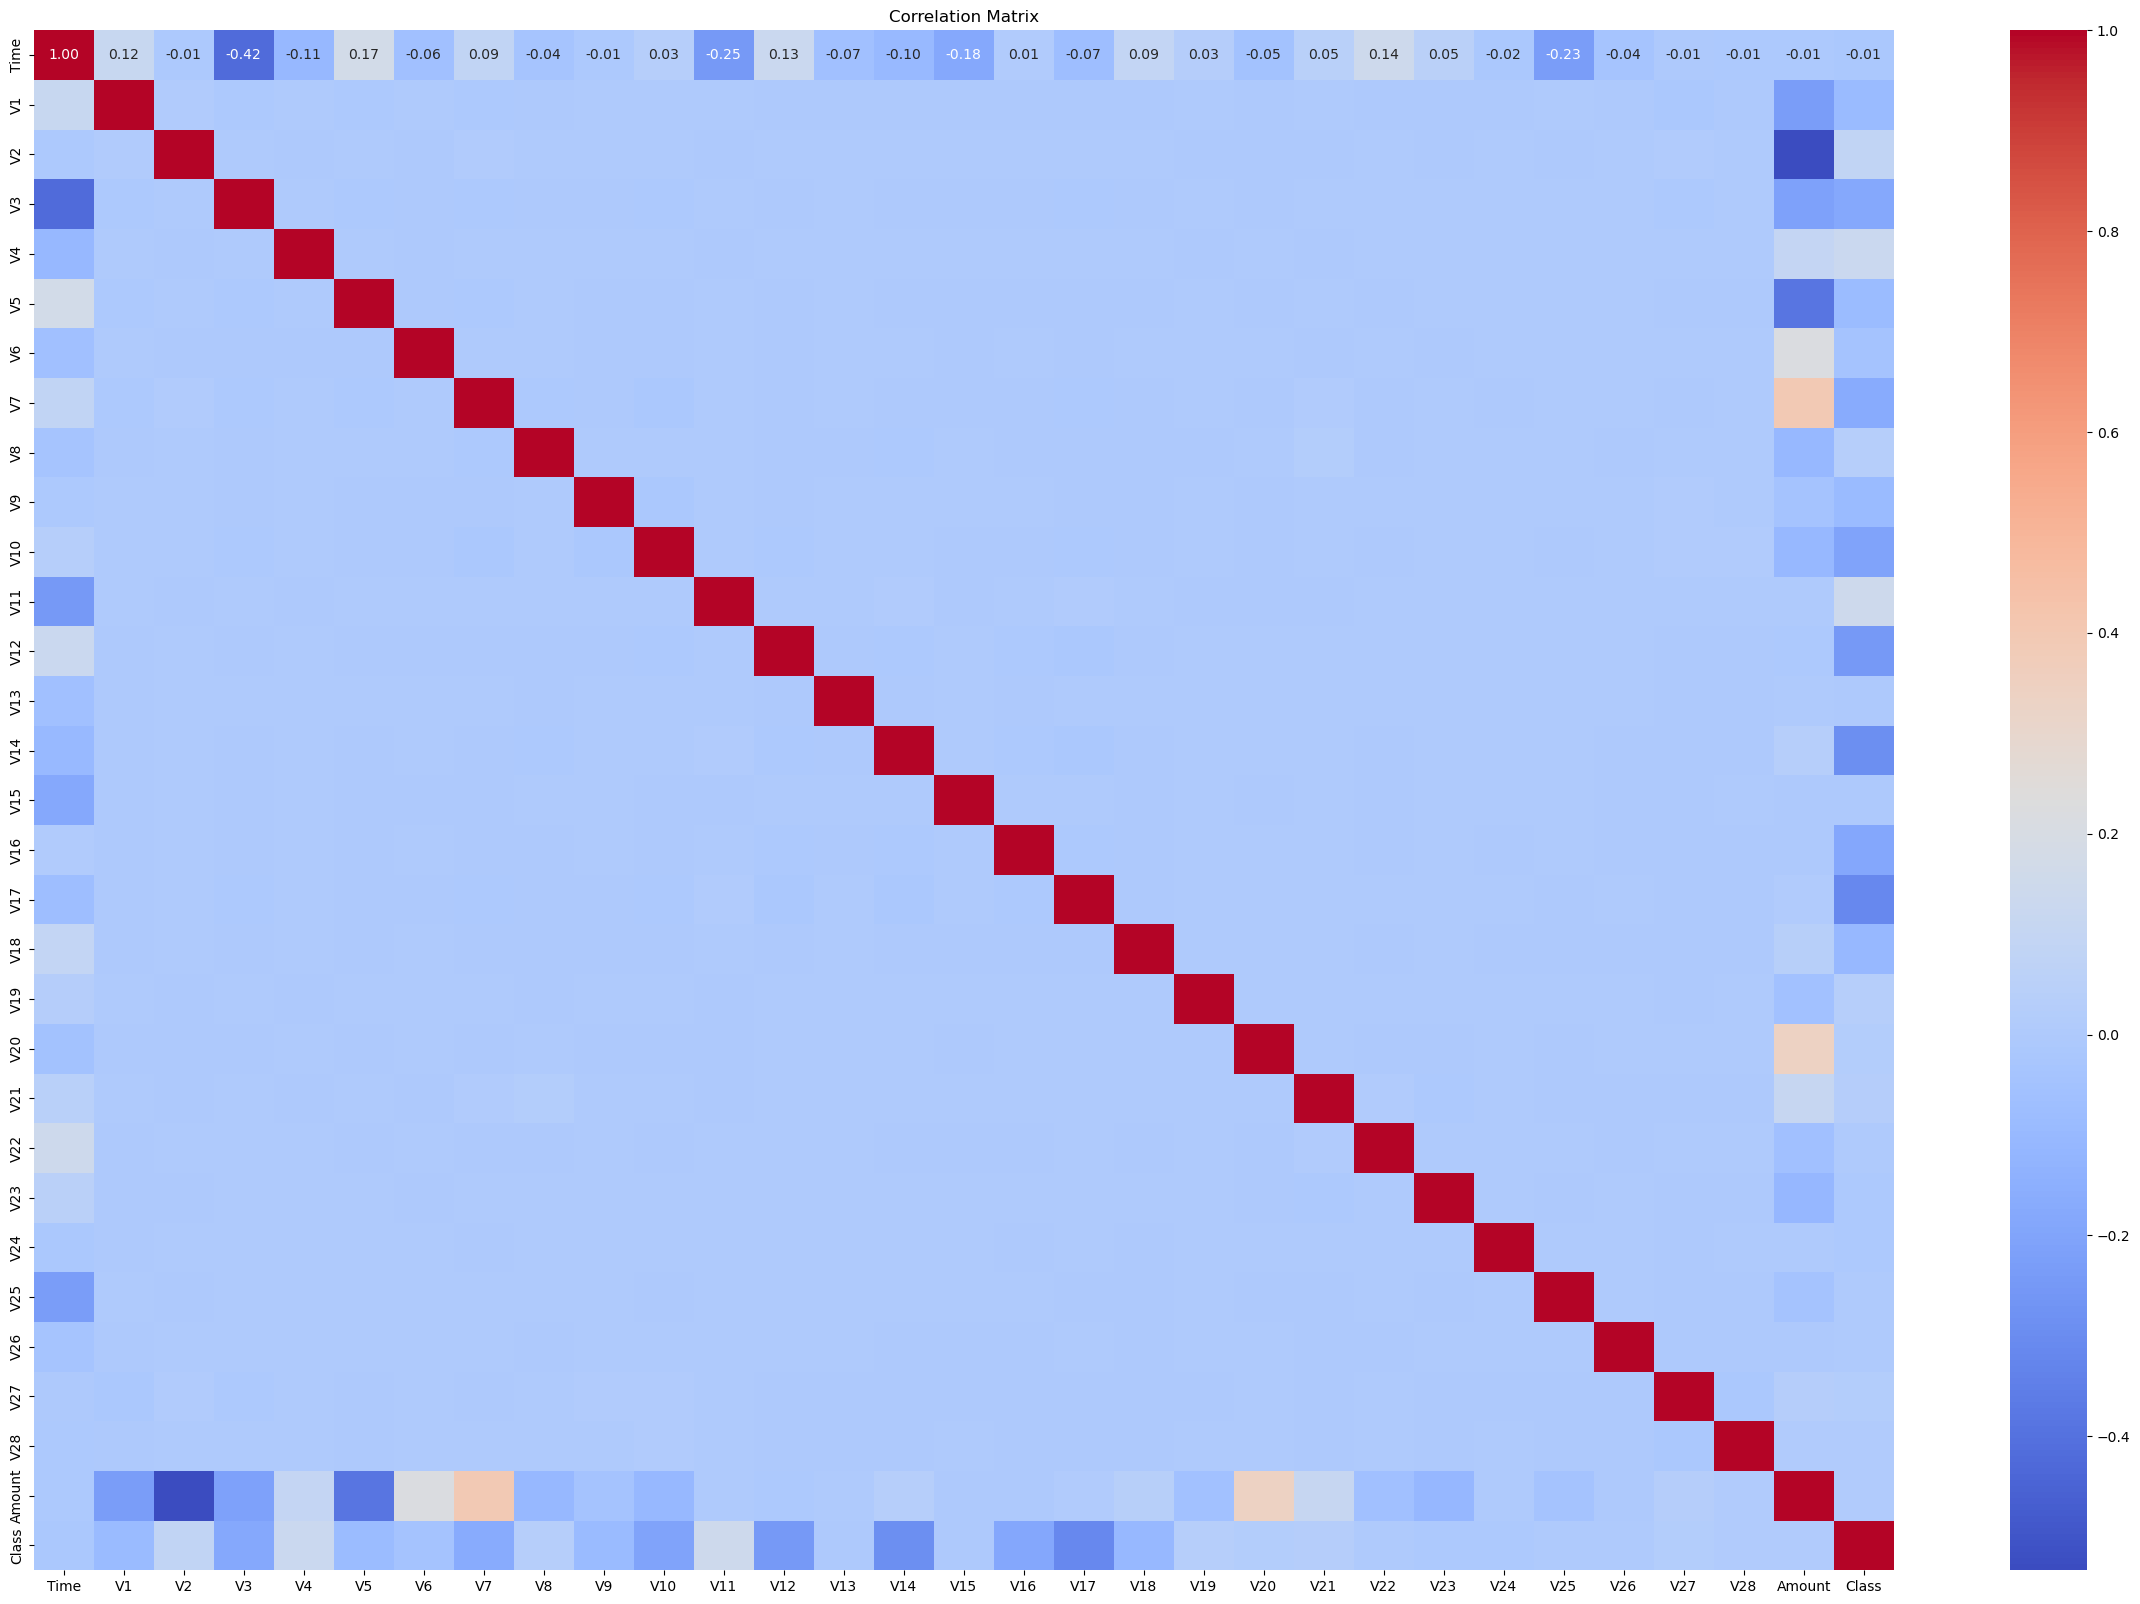

In [25]:
# Plotting Heatmap for above Correlation
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True, fmt='.2f',cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

#### Seprating the data for analysis

In [30]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [35]:
legit.shape    # Dimension of Legit transaction

(283253, 31)

In [36]:
fraud.shape  # Dimension of Fraud transaction

(473, 31)

Statistical measures of the data

In [47]:
legit.Amount.describe()      # Display descriptive statistics with background gradient

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [48]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Compare the values for both transactions

In [49]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


To solve above described problem, we will use concept of Under-sampling further

# Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent transactions.

Number of Fraudulent transactions --> 473

In [50]:
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler

In [51]:
X=df.drop(columns='Class',axis=1)
Y=df['Class']

In [52]:
# Implementing UnderSampling to handle imbalanced dataset
rus=RandomUnderSampler(random_state=42,sampling_strategy=1)
X_sample,Y_sample=rus.fit_resample(X,Y)
X_sample.shape

(946, 30)

In [53]:
Y_sample.shape

(946,)

In [54]:
Y_sample.value_counts()

Class
0    473
1    473
Name: count, dtype: int64

Now, the dataset is balanced with 473 each data containing normal and Fraudulent transactions.

# Training, Validation and Test Sets

In [58]:
from sklearn.model_selection import train_test_split

Splitting the data into Features and Targets

In [59]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [60]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


Splitting the data into Training and Testing Data

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X_sample,Y_sample,test_size=.2,stratify=Y_sample,random_state=42)

In [62]:
X.shape,X_train.shape,X_test.shape

((283726, 30), (756, 30), (190, 30))

# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
model=LogisticRegression(solver='liblinear')

Training the Logistic Regression model with training data

In [65]:
model.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

In [66]:
print(model.coef_.tolist())

[[-1.773971758174909e-05, -0.054408653710526465, 0.06507344978282646, -0.23956916529279848, 0.2295296754186498, 0.05147854013375039, -0.06596788524749611, -0.08236528458540245, -0.05607124240561685, -0.07480029906539126, -0.16015639182162653, 0.12324841241449724, -0.19426935139145385, -0.03232952233395305, -0.31872599979079913, -0.027809942080544797, -0.07063147932546679, -0.07509065317060332, 0.0010175657537664017, -0.01111490791907766, -0.0035298693274774602, 0.01866029276955092, 0.03412527486399525, -0.01046175370766833, -0.00432237284724174, -0.00977944867039924, -0.007901944939300907, 0.014321892480507609, 0.003707326339325919, 0.00046738962314534497]]


In [67]:
n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    'feature':X.columns.tolist(),
    'weight':model.coef_.tolist()[0]
})

In [68]:
weight_df.head(10)

,feature,weight
0,Time,-0.000018
1,V1,-0.054409
2,V2,0.065073
3,V3,-0.239569
4,V4,0.229530
5,V5,0.051479
6,V6,-0.065968
7,V7,-0.082365
8,V8,-0.056071
9,V9,-0.074800


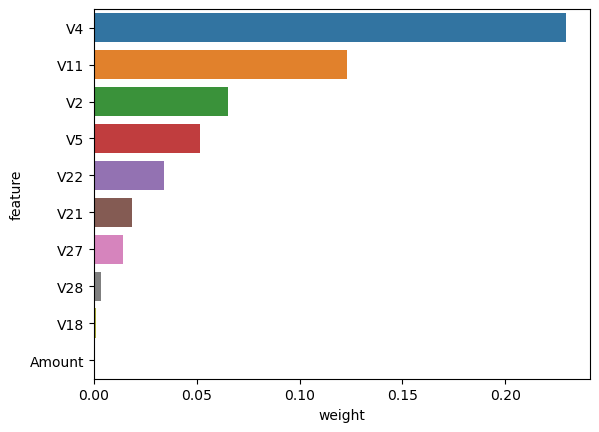

In [69]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10),
            x='weight',y='feature');

In [70]:
print(model.intercept_)

[-0.03883254]


# Model Evaluation

## Accuracy Score

In [72]:
from sklearn.metrics import accuracy_score,classification_report

Accuracy on Training data

In [73]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [74]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  0.9246031746031746


The model achieves an accuracy of 92.4% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(Y_train,X_train_prediction,normalize='true')

array([[0.97883598, 0.02116402],
       [0.12962963, 0.87037037]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [77]:
def predict_and_plot(inputs,targets,name=''):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 92.46%


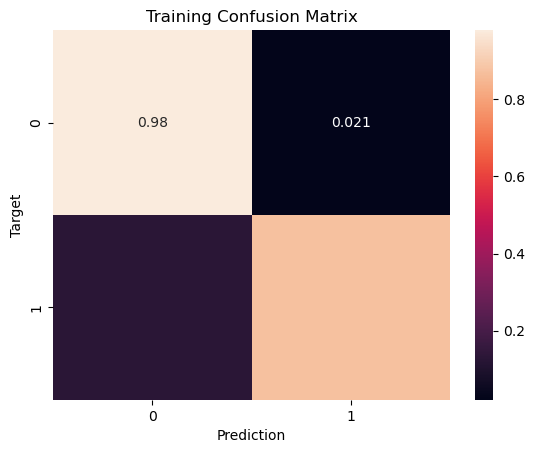

In [78]:
X_train_prediction=predict_and_plot(X_train,Y_train,'Training')

Accuracy: 95.79%


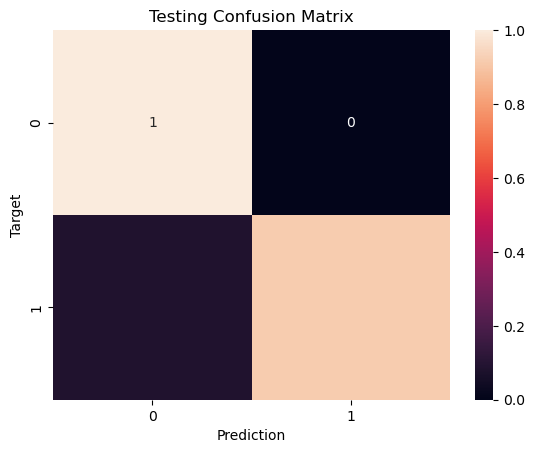

In [79]:
X_test_prediction=predict_and_plot(X_test,Y_test,'Testing')

Accuracy on Test data

In [80]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [81]:
print('Accuracy on Testing data: ',testing_data_accuracy)

Accuracy on Testing data:  0.9578947368421052


In [82]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        95
           1       1.00      0.92      0.96        95

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



Accuracy score of both Training and Testing data is close to each other and above 90% which is good sign that our model is not over-fitted or under-fitted.

## Training and Visualizing Decision Trees

We can use DecisionTreeClassifier from sklearn.tree to train a decision tree.

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
model=DecisionTreeClassifier(random_state=42)

In [85]:
%%time
model.fit(X_train,Y_train)

Wall time: 22.9 ms


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [88]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [89]:
X_train_prediction

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [90]:
pd.value_counts(X_train_prediction)

C:\Users\Suraj_Hotkar\AppData\Local\Temp\ipykernel_2120\3027833930.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(X_train_prediction)


0    378
1    378
Name: count, dtype: int64

In [91]:
print('Accuracy on Training data: ',training_data_accuracy)

Accuracy on Training data:  1.0


The training set accuracy is 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using model.score

In [92]:
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [93]:
print('Accuracy on Testing data: ',testing_data_accuracy)

Accuracy on Testing data:  0.9052631578947369


Although the training accuracy is 100%, the accuracy on the validation set is just about 90.5%, which is much better then always predicting "Yes".

In [95]:
X_test_prediction

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [96]:
pd.value_counts(X_test_prediction)/len(X_test_prediction)

C:\Users\Suraj_Hotkar\AppData\Local\Temp\ipykernel_2120\362203858.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(X_test_prediction)/len(X_test_prediction)


1    0.542105
0    0.457895
Name: count, dtype: float64

Accuracy score of both Training and Testing data is close to each other and above 85% which is good sign that our model is not over-fitted or under-fitted.

### Visualization

We can visualize the decision tree learned from the training data.

In [98]:
from sklearn.tree import plot_tree,export_text

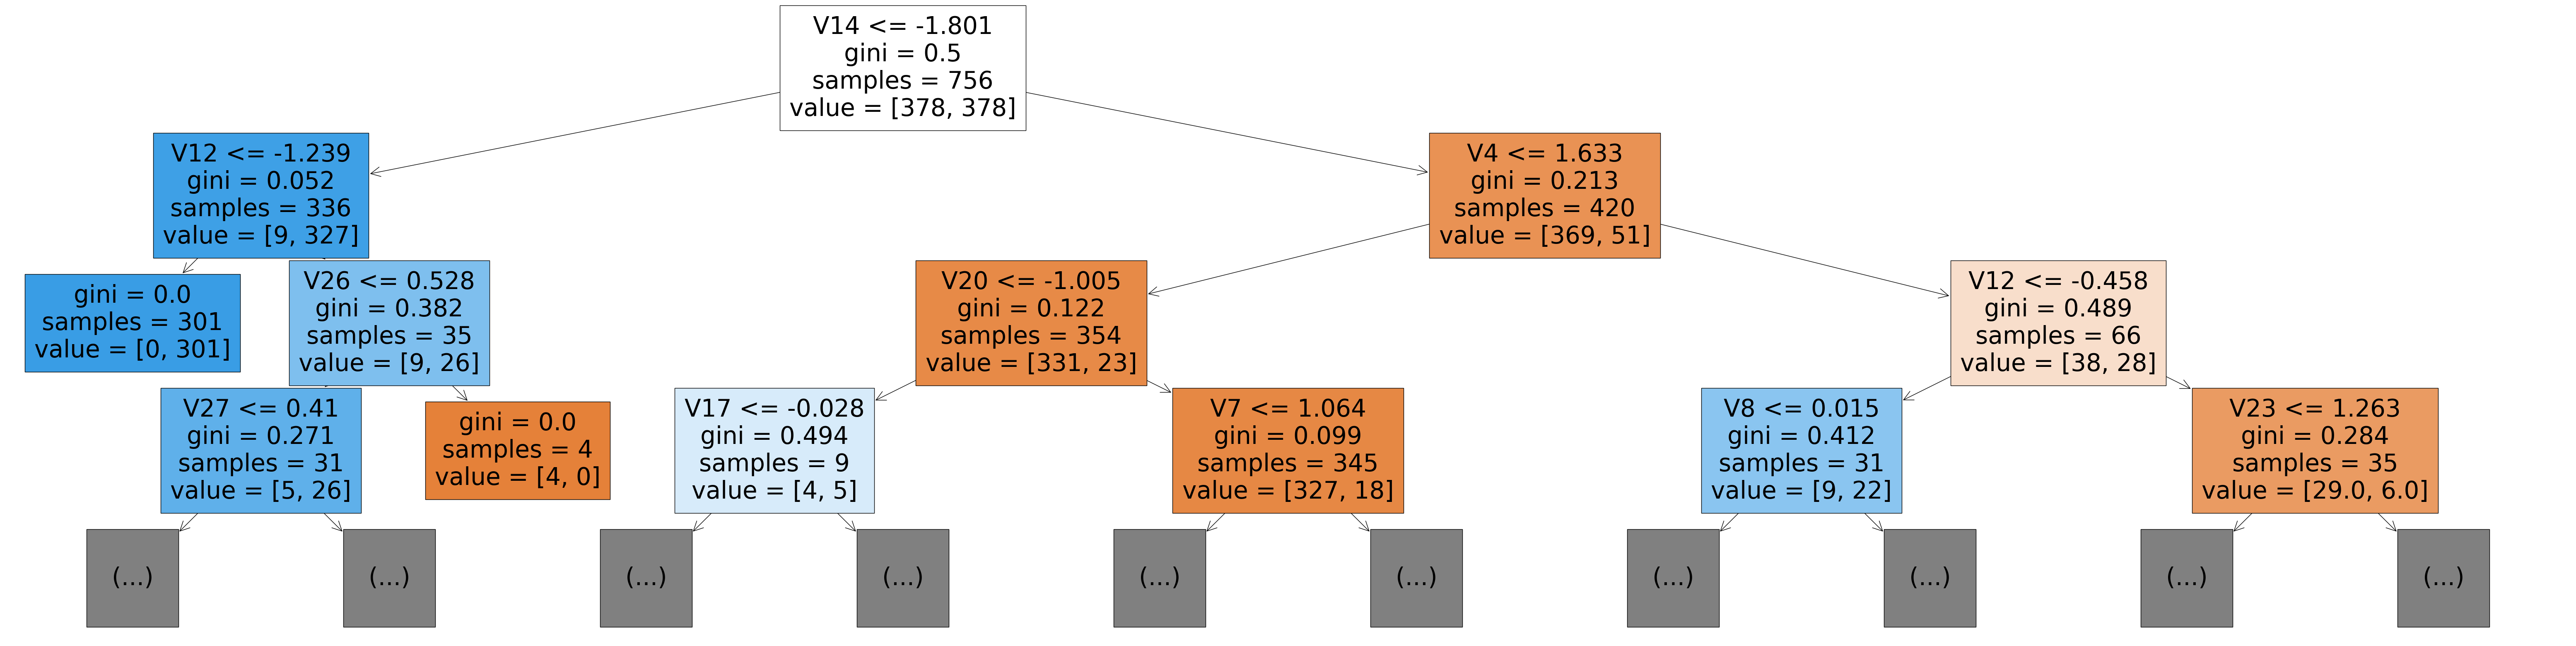

In [99]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,max_depth=3,filled=True);

In [100]:
model.tree_.max_depth

11

We can also display the tree as text, which can be easier to follow for deeper trees.

In [101]:
tree_text=export_text(model,max_depth=5,feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- V14 <= -1.80
|   |--- V12 <= -1.24
|   |   |--- class: 1
|   |--- V12 >  -1.24
|   |   |--- V26 <= 0.53
|   |   |   |--- V27 <= 0.41
|   |   |   |   |--- V11 <= 2.88
|   |   |   |   |   |--- V10 <= 0.31
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- V10 >  0.31
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- V11 >  2.88
|   |   |   |   |   |--- class: 0
|   |   |   |--- V27 >  0.41
|   |   |   |   |--- class: 0
|   |   |--- V26 >  0.53
|   |   |   |--- class: 0
|--- V14 >  -1.80
|   |--- V4 <= 1.63
|   |   |--- V20 <= -1.00
|   |   |   |--- V17 <= -0.03
|   |   |   |   |--- class: 1
|   |   |   |--- V17 >  -0.03
|   |   |   |   |--- V17 <= 1.29
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- V17 >  1.29
|   |   |   |   |   |--- class: 1
|   |   |--- V20 >  -1.00
|   |   |   |--- V7 <= 1.06
|   |   |   |   |--- V21 <= -1.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- V21 >  -1.00
|   |   |   |   |   |--- V11 <= 2.20
| 

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [102]:
model.feature_importances_

array([0.        , 0.00510204, 0.        , 0.00352734, 0.04907682,
       0.        , 0.        , 0.00544282, 0.01759447, 0.        ,
       0.00156771, 0.01842323, 0.03616879, 0.00819295, 0.72411932,
       0.00570754, 0.        , 0.01175779, 0.        , 0.00255582,
       0.02287068, 0.00849441, 0.        , 0.01191893, 0.00478466,
       0.00485009, 0.02257388, 0.01236193, 0.00787352, 0.01503527])

Let's turn this into a dataframe and visualize the most important features.

In [103]:
importance_df=pd.DataFrame({
    'feature': X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [104]:
importance_df.head(10)

,feature,importance
14,V14,0.724119
4,V4,0.049077
12,V12,0.036169
20,V20,0.022871
26,V26,0.022574
11,V11,0.018423
8,V8,0.017594
29,Amount,0.015035
27,V27,0.012362
23,V23,0.011919


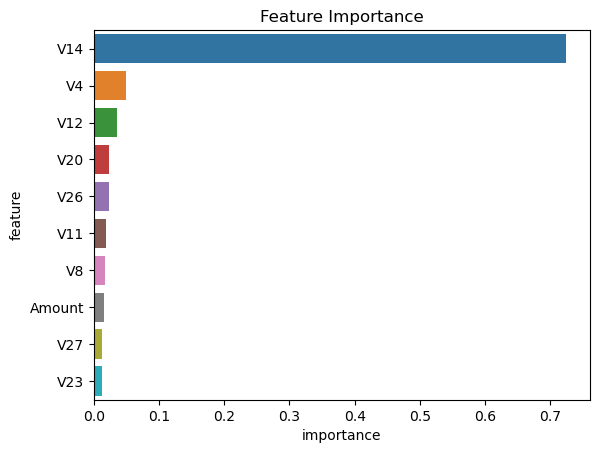

In [105]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

 We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(Y_train,X_train_prediction,normalize='true')

array([[1., 0.],
       [0., 1.]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [108]:
def predict_and_plot(inputs,targets,name=''):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    
    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf,annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 100.00%


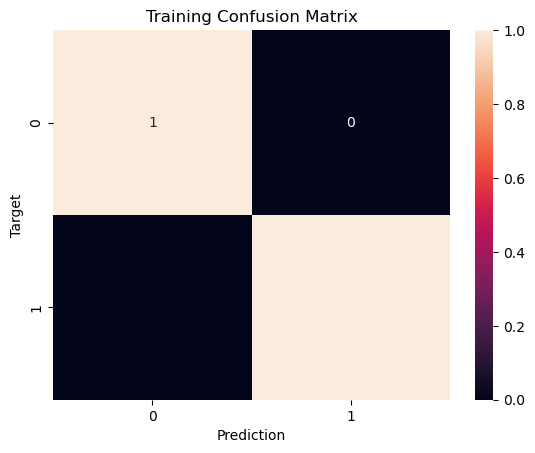

In [109]:
X_train_prediction=predict_and_plot(X_train,Y_train,'Training')

Accuracy: 90.53%


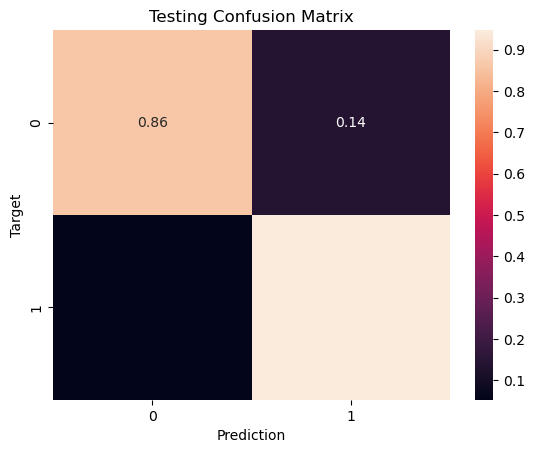

In [110]:
X_test_prediction=predict_and_plot(X_test,Y_test,'Testing')

In [111]:
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        95
           1       0.87      0.95      0.91        95

    accuracy                           0.91       190
   macro avg       0.91      0.91      0.91       190
weighted avg       0.91      0.91      0.91       190



## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as regularlization.

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

* max_depth
* max_leaf_nodes

### max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [112]:
model=DecisionTreeClassifier(max_depth=3,random_state=42)

In [113]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using model.score

In [114]:
model.score(X_train,Y_train)

0.9444444444444444

In [115]:
model.score(X_test,Y_test)

0.9473684210526315

Great, while the training accuracy of the model has gone down, the testing accuracy of the model has increased significantly.

In [116]:
model.classes_

array([0, 1], dtype=int64)

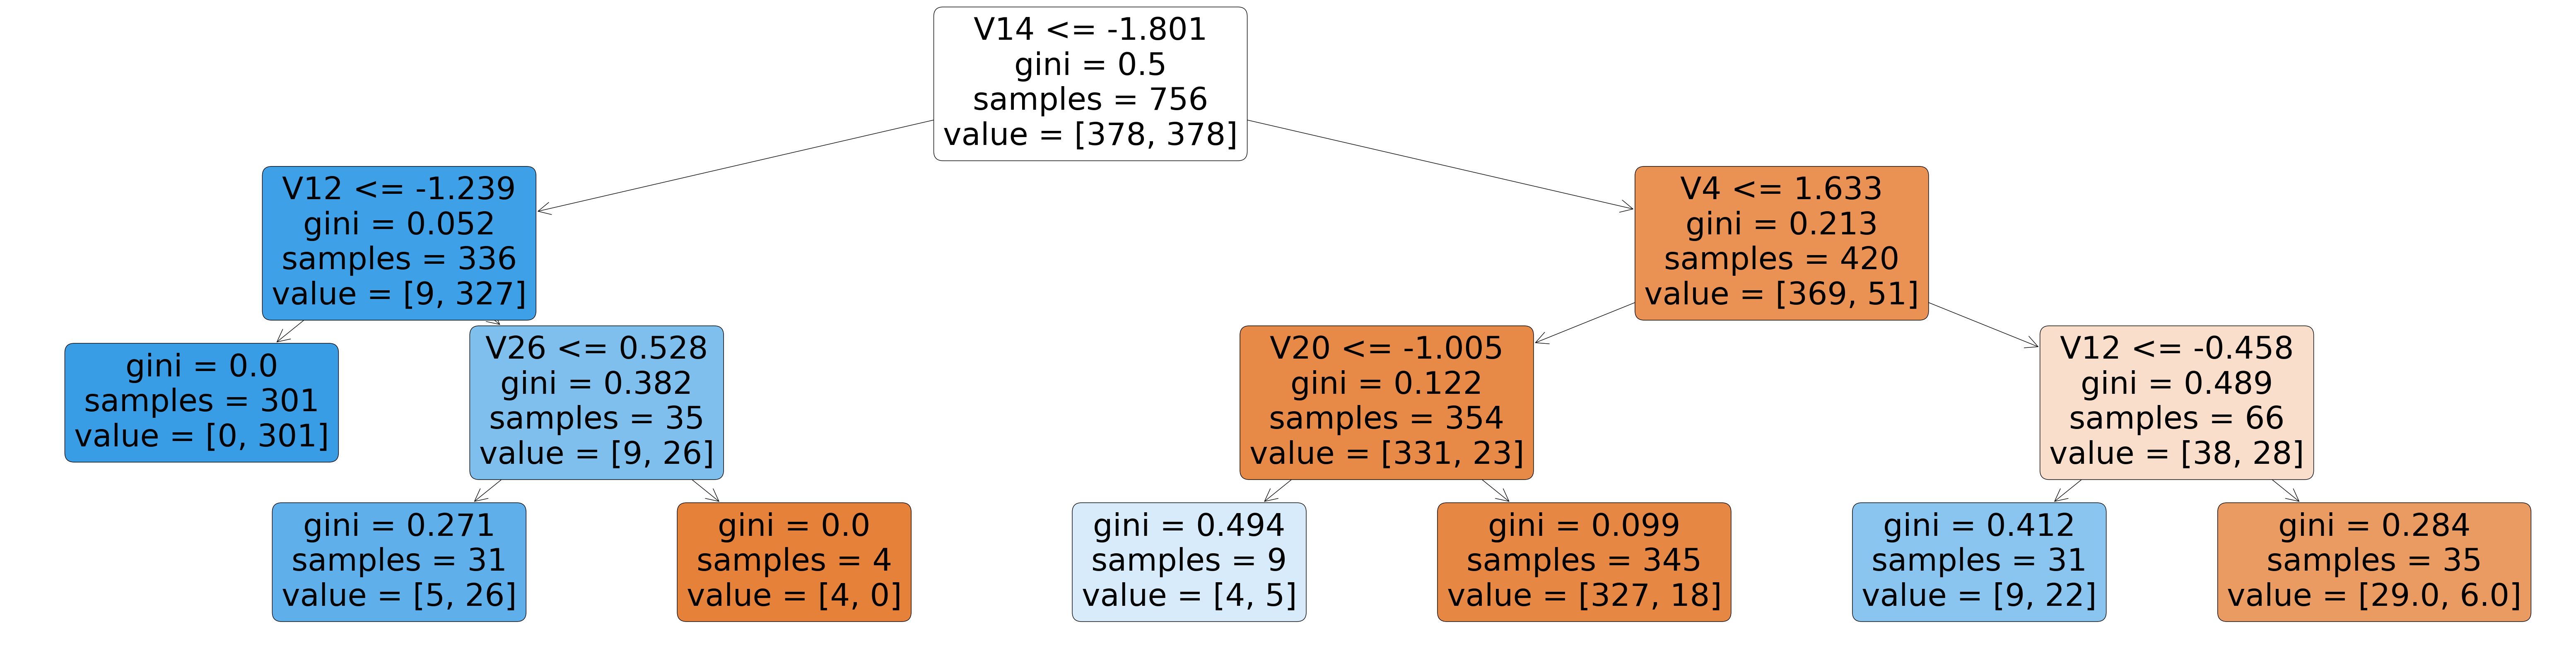

In [117]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=X_train.columns,filled=True,rounded=True);

In [118]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- V14 <= -1.80
|   |--- V12 <= -1.24
|   |   |--- class: 1
|   |--- V12 >  -1.24
|   |   |--- V26 <= 0.53
|   |   |   |--- class: 1
|   |   |--- V26 >  0.53
|   |   |   |--- class: 0
|--- V14 >  -1.80
|   |--- V4 <= 1.63
|   |   |--- V20 <= -1.00
|   |   |   |--- class: 1
|   |   |--- V20 >  -1.00
|   |   |   |--- class: 0
|   |--- V4 >  1.63
|   |   |--- V12 <= -0.46
|   |   |   |--- class: 1
|   |   |--- V12 >  -0.46
|   |   |   |--- class: 0



In [119]:
print(export_text(model,feature_names=list(X_train.columns)))

|--- V14 <= -1.80
|   |--- V12 <= -1.24
|   |   |--- class: 1
|   |--- V12 >  -1.24
|   |   |--- V26 <= 0.53
|   |   |   |--- class: 1
|   |   |--- V26 >  0.53
|   |   |   |--- class: 0
|--- V14 >  -1.80
|   |--- V4 <= 1.63
|   |   |--- V20 <= -1.00
|   |   |   |--- class: 1
|   |   |--- V20 >  -1.00
|   |   |   |--- class: 0
|   |--- V4 >  1.63
|   |   |--- V12 <= -0.46
|   |   |   |--- class: 1
|   |   |--- V12 >  -0.46
|   |   |   |--- class: 0



Let's experiment with different depths using a helper function.

In [120]:
def max_depth_error(md):
    model=DecisionTreeClassifier(max_depth=md,random_state=42)
    model.fit(X_train,Y_train)
    train_acc=1-model.score(X_train,Y_train)
    test_acc=1-model.score(X_test,Y_test)
    return {'Max Depth':md,'Training Error':train_acc,'Testing Error':test_acc}

In [121]:
%%time
errors_df=pd.DataFrame([max_depth_error(md) for md in range(1,9)])

Wall time: 172 ms


In [122]:
errors_df

,Max Depth,Training Error,Testing Error
0,1,0.079365,0.063158
1,2,0.079365,0.063158
2,3,0.055556,0.052632
3,4,0.038360,0.057895
4,5,0.025132,0.068421
5,6,0.015873,0.073684
6,7,0.010582,0.073684
7,8,0.010582,0.073684


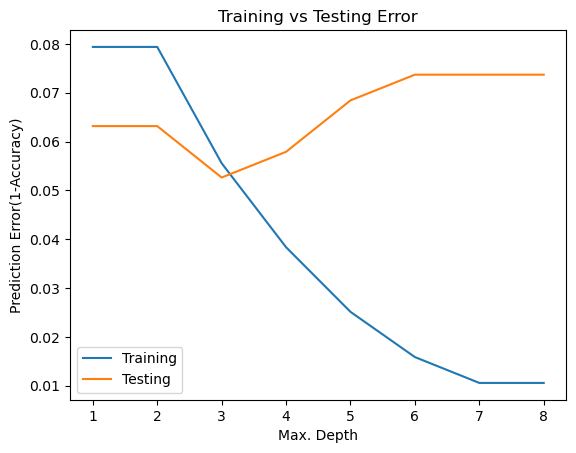

In [123]:
plt.figure()
plt.plot(errors_df['Max Depth'],errors_df['Training Error'])
plt.plot(errors_df['Max Depth'],errors_df['Testing Error'])
plt.title('Training vs Testing Error')
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training','Testing']);

In the above case, it appears that a maximum depth of 2 results in the lowest validation error.

In [124]:
model=DecisionTreeClassifier(max_depth=2,random_state=42).fit(X_train,Y_train)
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9206349206349206, 0.9368421052631579)

### max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [125]:
model=DecisionTreeClassifier(random_state=42,max_leaf_nodes=5)

In [126]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=42)

In [127]:
model.score(X_train,Y_train)

0.9431216931216931

In [128]:
model.score(X_test,Y_test)

0.9473684210526315

In [129]:
model.tree_.max_depth

4

Notice that the model was able to achieve a greater depth of  for certain paths while keeping other paths shorter.

In [130]:
model_text=export_text(model)   #feature_names=list(X_train.columns)
print(model_text)

|--- feature_14 <= -1.80
|   |--- class: 1
|--- feature_14 >  -1.80
|   |--- feature_4 <= 1.63
|   |   |--- class: 0
|   |--- feature_4 >  1.63
|   |   |--- feature_12 <= -0.46
|   |   |   |--- feature_8 <= 0.02
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  0.02
|   |   |   |   |--- class: 0
|   |   |--- feature_12 >  -0.46
|   |   |   |--- class: 0



## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

A random forest works by averaging/combining the results of several decision trees.

We'll use the RandomForestClassifier class from sklearn.ensemble.

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
model=RandomForestClassifier(random_state=42,n_jobs=-1)

n_jobs allows the random forest to use mutiple parallel workers to train decision trees, and random_state=42 ensures that the we get the same results for each execution.

In [134]:
%%time
model.fit(X_train,Y_train)

Wall time: 233 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [135]:
model.score(X_train,Y_train)

1.0

In [136]:
model.score(X_test,Y_test)

0.9473684210526315

Once again, the training accuracy is 100%, but this time the testing accuracy is much better. In fact, it is better than the best single decision tree we had trained so far.

We can can access individual decision trees using model.estimators_

In [137]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

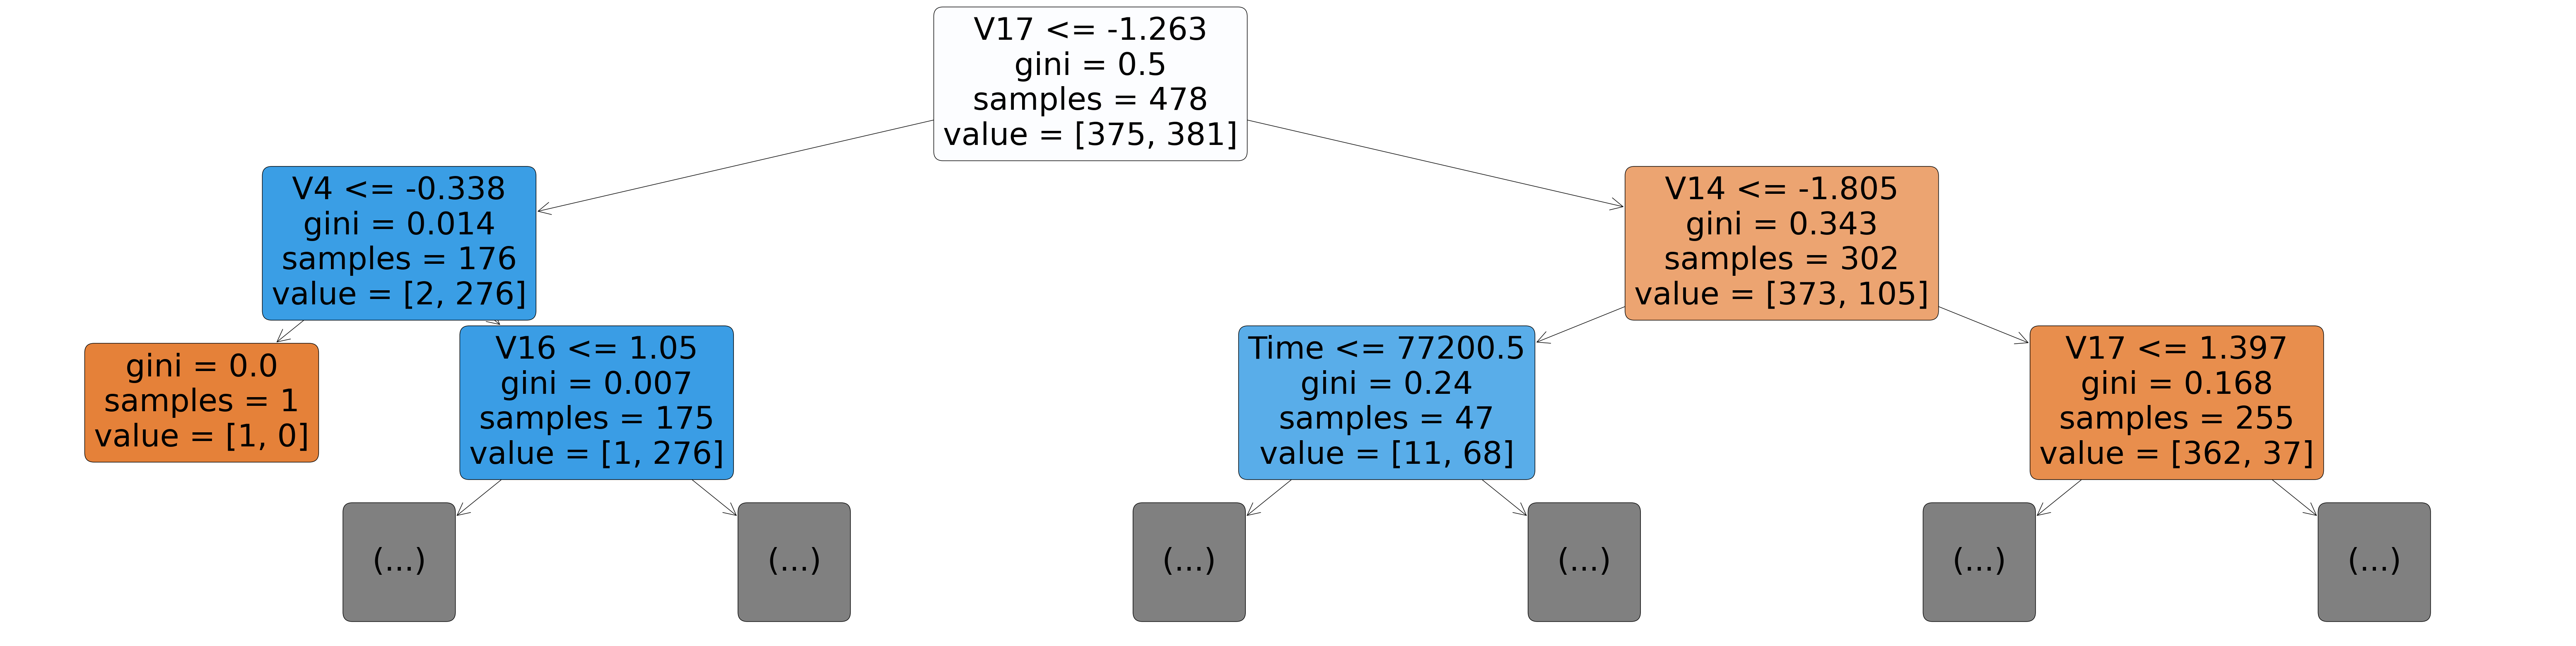

In [138]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True);  

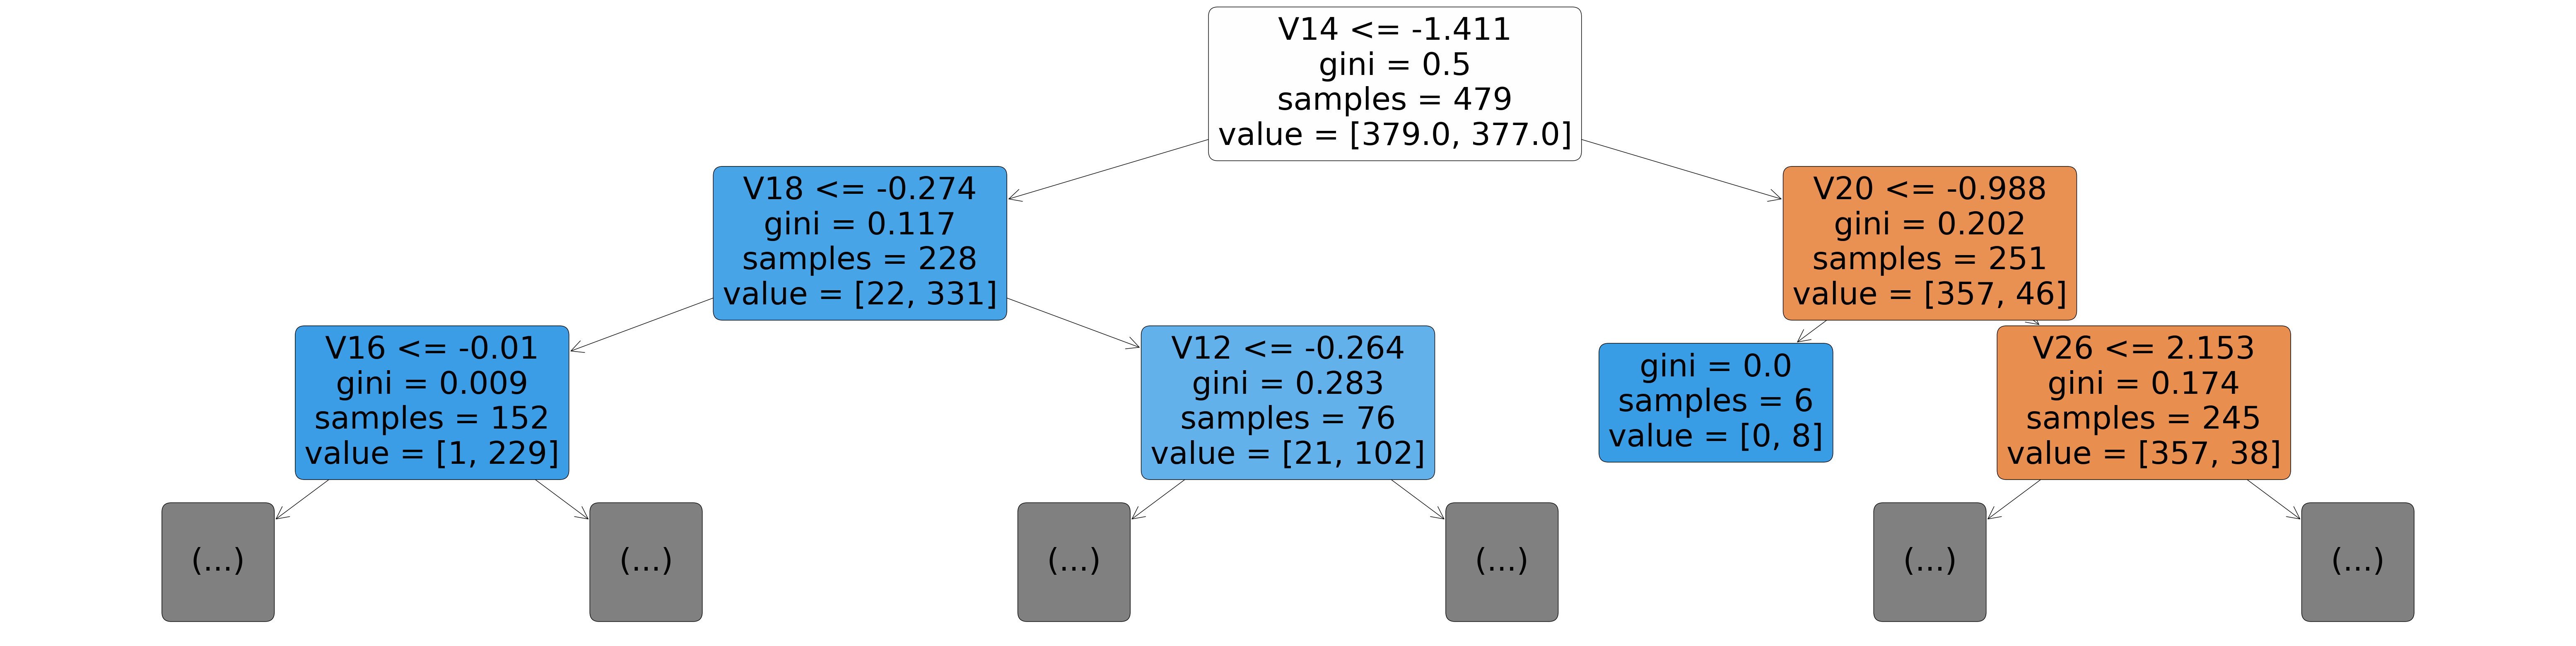

In [139]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20],max_depth=2,feature_names=X_train.columns,filled=True,rounded=True);

In [140]:
len(model.estimators_)

100

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [141]:
importance_df=pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance',ascending=False)

In [142]:
importance_df.head(10)

,feature,importance
14,V14,0.186193
10,V10,0.112129
17,V17,0.099586
12,V12,0.091743
4,V4,0.084772
11,V11,0.063807
3,V3,0.055015
16,V16,0.054870
2,V2,0.031612
9,V9,0.028912


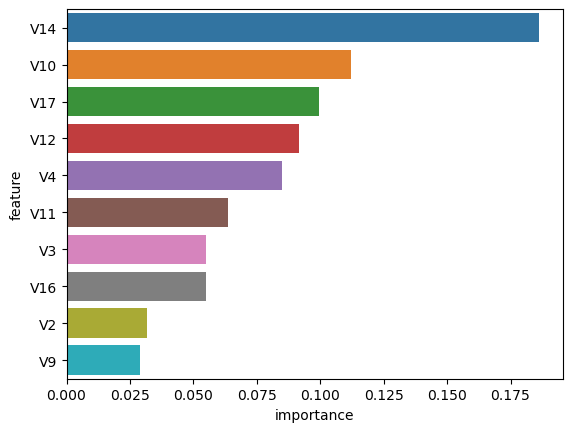

In [143]:
sns.barplot(data=importance_df.head(10),x='importance',y='feature');

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

Let's create a base model with which we can compare models with tuned hyperparameters.

In [144]:
base_model=RandomForestClassifier(random_state=42,n_jobs=-1).fit(X_train,Y_train)

In [145]:
base_train_acc=base_model.score(X_train,Y_train)
base_test_acc=base_model.score(X_test,Y_test)

In [146]:
base_accs=base_train_acc,base_test_acc
base_accs

(1.0, 0.9473684210526315)

We can use this as a benchmark for hyperparmeter tuning.

### n_estimators

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.

#### 10 estimators

In [148]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=10)

In [149]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [150]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9973544973544973, 0.9421052631578948)

In [151]:
base_accs

(1.0, 0.9473684210526315)

#### 2 estimators

In [153]:
model=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=2)

In [154]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=2, n_jobs=-1, random_state=42)

In [155]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.958994708994709, 0.9315789473684211)

In [156]:
base_accs

(1.0, 0.9473684210526315)

### max_depth and max_leaf_nodes

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a max_depth to reduce overfitting.

Let's define a helper function test_params to make it easy to test hyperparameters.

In [157]:
def test_params(**params):
    model=RandomForestClassifier(random_state=42,n_jobs=-1,**params).fit(X_train,Y_train)
    return model.score(X_train,Y_train) ,model.score(X_test,Y_test)

Let's test a few values of max_depth and max_leaf_nodes.

In [158]:
test_params(max_depth=2,max_leaf_nodes=128,n_estimators=50)

(0.9272486772486772, 0.9368421052631579)

In [159]:
test_params(max_depth=5)

(0.9537037037037037, 0.9473684210526315)

In [160]:
test_params(max_leaf_nodes=2**5)

(0.9920634920634921, 0.9473684210526315)

In [161]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9473684210526315)

In [162]:
base_accs  # no max depth or max leaf nodes

(1.0, 0.9473684210526315)

### max_features
Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

In [164]:
test_params(max_features='log2')

(1.0, 0.9421052631578948)

In [165]:
test_params(max_features=3)

(1.0, 0.9473684210526315)

In [166]:
test_params(max_features=10)

(1.0, 0.9421052631578948)

In [167]:
base_accs

(1.0, 0.9473684210526315)

### min_samples_split and min_samples_leaf

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [168]:
test_params(min_samples_split=2, min_samples_leaf=2)

(0.996031746031746, 0.9421052631578948)

In [169]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.9193121693121693, 0.9368421052631579)

In [170]:
base_accs

(1.0, 0.9473684210526315)

### min_impurity_decrease

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.

In [171]:
test_params(min_impurity_decrease=1e-7)

(1.0, 0.9473684210526315)

In [172]:
test_params(min_impurity_decrease=1e-2)

(0.9351851851851852, 0.9421052631578948)

In [173]:
base_accs

(1.0, 0.9473684210526315)

### bootstrap, max_samples

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [174]:
test_params(bootstrap=False)

(1.0, 0.9473684210526315)

In [175]:
base_accs

(1.0, 0.9473684210526315)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using max_samples. This can further generalize the model.

In [176]:
test_params(max_samples=.6)

(0.996031746031746, 0.9421052631578948)

In [177]:
base_accs

(1.0, 0.9473684210526315)

### class_weight

In [178]:
Y_train.value_counts()/len(Y_train)

Class
0    0.5
1    0.5
Name: count, dtype: float64

In [179]:
model.classes_

array([0, 1], dtype=int64)

In [180]:
test_params(class_weight='balanced')

(1.0, 0.9473684210526315)

In [181]:
base_accs

(1.0, 0.9473684210526315)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [182]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=60,random_state=42,max_features=8,max_depth=9,
                            min_samples_split=100,min_samples_leaf=90,bootstrap=False,
                             min_impurity_decrease=1e-2)

In [183]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=False, max_depth=9, max_features=8,
                       min_impurity_decrease=0.01, min_samples_leaf=90,
                       min_samples_split=100, n_estimators=60, n_jobs=-1,
                       random_state=42)

In [184]:
model.score(X_train,Y_train),model.score(X_test,Y_test)

(0.9298941798941799, 0.9421052631578948)

In [185]:
base_accs

(1.0, 0.9473684210526315)

We've increased the accuracy from 91.7% with a single decision tree to 93.78% with a well-tuned random forest. Also, model is not over-fitted as accuracy score of both training and testing data is nearby with a small difference in between them. This proves that our model is perfect as accuracy score of both training and testing data is above 90% which is a good sign

## Making Predictions on New Inputs

In [186]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [187]:
# Lets create a sample dictionary
new_input={'Time':2,
    'V1':-1.158233,
           'V2':0.877737,
           'V3':1.548718,
           'V4':0.403034,
           'V5':-0.407193,
           'V6':0.095921,
           'V7':0.592941,
           'V8':-0.270533,
           'V9':0.817739,
           'V10':0.753074,
           'V11':-0.822843,
           'V12':0.538196,
           'V13':1.345852,
           'V14':-1.119670,
           'V15':0.175121,
           'V16':-0.451449,
           'V17':-0.237033,
           'V18':-0.038195,
           'V19':0.803487,
           'V20':0.408542,
           'V21':-0.009431,
           'V22':0.798278,
           'V23':-0.137458,
           'V24':0.141267,
           'V25':-0.206010,
           'V26':0.502292,
           'V27':0.219422,
           'V28':0.215153,
           'Amount':69.99
}

In [188]:
# Converting the dictionary into a dataframe
input_df=pd.DataFrame([new_input])
pred=model.predict(input_df)[0]
prob = model.predict_proba(input_df)[0][list(model.classes_).index(pred)]

In [189]:
pred,prob

(0, 0.8710289923387027)

So, we can see that predicted class is 0 by our model which is true as original. Hence, we can say that our model is working fine with a predicting probability of 87% which is also good.

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the joblib module to save and load Python objects on the disk.

In [190]:
import joblib

In [191]:
df={
    'model':model,
    'X':X,
    'Y':Y,
    'X_sample':X_sample,
    'Y_sample':Y_sample
}

In [192]:
joblib.dump(df, 'df.joblib')

['df.joblib']

## Conclusion
I would Like to thank the UpGrad community and teachers for providing such a great Data Science Bootcamp Course. Through their material, I learnt many things regarding data analysis, exploration, visualization, manipulation, and cleaning. I also learnt about different supervised learning algorithms. I have completed this project all by myself. I, however, have taken references of the syntax, methods, and hyperparameters from the previous Google , from some videos,course's notebooks and sklearn's official documentation.